In [0]:
!pip install tf-explain

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 as cv
import sklearn.utils
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from tf_explain.core import GradCAM
from tf_explain.core import SmoothGrad
from tf_explain.core import IntegratedGradients
import os
from IPython.display import Image


In [0]:

from google.colab import drive
drive.mount('/content/gdrive')
#changing the working directory

%cd /content/gdrive/My Drive/

#%cd /content/gdrive/My Drive/Kaggle

#Check the present working directory using pwd command

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [0]:
"""
cd /content/gdrive/My Drive/dataset
unzip preprocessing.zip
"""

%cd /content/gdrive/My Drive/dataset
"""
!ls
!unzip dstrts.zip
"""

/content/gdrive/My Drive/dataset


'\n!ls\n!unzip dstrts.zip\n'

In [0]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/dataset/vgg16bnus2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 299, 299, 64)      640       
_________________________________________________________________
batch_normalization_26 (Batc (None, 299, 299, 64)      256       
_________________________________________________________________
activation_26 (Activation)   (None, 299, 299, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 299, 299, 64)      36928     
_________________________________________________________________
batch_normalization_27 (Batc (None, 299, 299, 64)      256       
_________________________________________________________________
activation_27 (Activation)   (None, 299, 299, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 64)     

In [0]:
IMAGE_PATH = 'mdb209.jpg'

In [0]:
"""
img = cv.imread(IMAGE_PATH,0)
img = cv.resize(img,(299,299))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.convert_to_tensor(img)
img = tf.image.per_image_standardization(img)
img = img.numpy()
img = img/255.
print(img.shape)
"""

'\nimg = cv.imread(IMAGE_PATH,0)\nimg = cv.resize(img,(299,299))\nimg = tf.keras.preprocessing.image.img_to_array(img)\nimg = tf.convert_to_tensor(img)\nimg = tf.image.per_image_standardization(img)\nimg = img.numpy()\nimg = img/255.\nprint(img.shape)\n'

In [0]:
#model.predict_classes(img.reshape(1,299,299,1))

In [0]:

X_test1 = np.load('../Kaggle/test10_data/test10_data.npy')
X_test2 = np.load('../Kaggle/cv10_data/cv10_data.npy')

y_test1 = np.load("../Kaggle/test10_labels.npy")
y_test2 = np.load("../Kaggle/cv10_labels.npy")
X_test = np.concatenate((X_test1,X_test2),axis = 0)
y_test = np.concatenate((y_test1,y_test2),axis = 0)


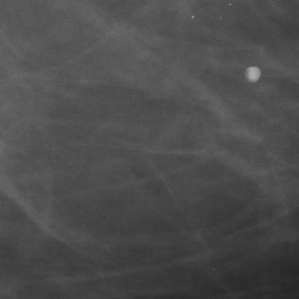

(299, 299, 1)
[0]


In [0]:

X_test = X_test[1]
cv2_imshow(X_test)
y_test = y_test[1:2]
img = tf.convert_to_tensor(img)
img = tf.image.per_image_standardization(img)
img = img.numpy()
X_test = X_test/255.
data = ([X_test],None)
print(X_test.shape)
print(y_test)


In [0]:
input_layer = layers.Input(batch_shape=model.layers[0].input_shape)
prev_layer = input_layer
for layer in model.layers:
    layer._inbound_nodes = []
    prev_layer = layer(prev_layer)

funcmodel = models.Model([input_layer], [prev_layer])

array([[1.9840256e-06]], dtype=float32)

In [0]:
explainer = GradCAM()
grid = explainer.explain(data, funcmodel, class_index=0)  
explainer.save(grid, ".", "grad_cam5.png")

